# Определение рыночной стоимости автомобиля

# Описание задачи

Необходимо определить рыночную стоимость автомобиля. Для этого имеются следующие данные: технические характеристики, комплектации и цены автомобилей. Нужно построить модель для определения рыночной стоимости автомобиля с учётом качества предсказания, скорости предсказания и времени обучения.

# План работы

1. Подготовка данных
2. Обучение моделей
    1. Кодирование данных и деление на обучающую и тестовую выборки
    2. Создание и обучение модели RandomForestRegressor
    3. Создание и обучение модели LinearRegression
    4. Создание и обучение модели CatBoostRegressor
    5. Создание и обучение модели LightGBM
3. Анализ моделей
    1. Модель RandomForestRegressor
    2. Модель LinearRegression
    3. Модель CatboostRegressor
    4. Модель LightGBM
    5. Вывод
4. Вывод

# Описание данных

**Признаки**
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

**Целевой признак**

Price — цена (евро)

## Подготовка данных

In [1531]:
# Импорт библиотек и функций
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

In [1532]:
# Чтение таблицы данных
data = pd.read_csv('datasets/autos.csv')

In [1533]:
#Просмотр таблицы и оценка ее размеров
data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [1534]:
# Вывод сводной информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

В таблице есть пропуски у следующих признаков: "VehicleType", "Gearbox", "Model", "FuelType", "Repaired". 

In [1535]:
#Количество пропусков nan
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Все указанные признаки являются категориальными, заполним их значением "unknown".

In [1536]:
#Заполнение пропусков nan значением "unknown"
data['VehicleType'] = data['VehicleType'].fillna('unknown')
data['Gearbox'] = data['Gearbox'].fillna('unknown')
data['Model'] = data['Model'].fillna('unknown')
data['FuelType'] = data['FuelType'].fillna('unknown')
data['Repaired'] = data['Repaired'].fillna('unknown')

In [1537]:
#Повторная проверка на пропуски
data.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

Удаление столбцов:

Столбцы с типом данных "дата и время" не обрабатываются моделью при ее обучении. Поэтому удалим их.

In [1538]:
#Удалим столбцы с типом данных "дата и время"
data = data.drop(['DateCrawled', 'DateCreated', 'LastSeen'], axis = 1)

Столбец "NumberOfPictures" содержит одно уникальное значение равное нулю:

In [1539]:
#Уникальные значения в столбце "NumberOfPictures"
data['NumberOfPictures'].unique()

array([0], dtype=int64)

Поэтому столбец "NumberOfPictures" можно тоже удалить:

In [1540]:
#Удаление столбца "NumberOfPictures"
data = data.drop(['NumberOfPictures'], axis = 1)

Столбец "PostalCode" содержит почтовый индекс владельца анкеты (пользователя), что является уникальными данными пользователя и для обучение модели бесполезно. Поэтому данный столбец тоже можно удалить:

In [1541]:
#Удаление столбца "PostalCode"
data = data.drop(['PostalCode'], axis = 1)

Далее исследуем данные на наличие некорректных значений и заменим их.

In [1542]:
#Проверка на наличие слишком низких значений года регистрации
data[data['RegistrationYear'] < 1920]["RegistrationYear"].unique()

array([1910, 1111, 1000, 1500, 1800, 1234, 1400, 1200, 1255, 1001, 1688,
       1253, 1919, 1600, 1039, 1300, 1915, 1602], dtype=int64)

In [1543]:
#Проверка на наличие слишком больших значений года регистрации
data[data['RegistrationYear'] > 2020]["RegistrationYear"].unique()

array([5000, 9999, 3200, 8888, 2200, 4100, 3000, 2066, 8000, 5300, 9000,
       2900, 6000, 5900, 5911, 4000, 8500, 3700, 3800, 4800, 7000, 6500,
       2290, 2500, 9450, 2800, 5555, 5600, 2222, 9996, 8455, 4500, 7800,
       9229, 7100, 8200, 7500, 3500], dtype=int64)

Используем для замены некорректных значений года регистрации значение моды.

In [1544]:
#Определение значения моды для корректных данных столбца RegistrationYear
data[(data['RegistrationYear'] > 1920) & (data['RegistrationYear'] < 2020)]["RegistrationYear"].mode()

0    2000
Name: RegistrationYear, dtype: int64

In [1545]:
#Замена некорректных значений года регистрации
data.loc[(data['RegistrationYear'] < 1920) | (data['RegistrationYear'] > 2020), 'RegistrationYear'] = 2000

In [1546]:
#Уникальные значения месяца регистрации
data["RegistrationMonth"].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

В столбце "RegistrationMonth" присутствует некорректное значение 0. Заменим его на значение моды.

In [1547]:
#Определение значения моды для корректных данных столбца RegistrationMonth
data[data["RegistrationMonth"]!=0]["RegistrationMonth"].mode()

0    3
Name: RegistrationMonth, dtype: int64

In [1548]:
#Замена некорректных значений месяца регистрации
data.loc[data['RegistrationMonth'] == 0, 'RegistrationMonth'] = 3

In [1549]:
#Проверка значений столбца "Power" на слишком большие значения.
data[data['Power'] > 1500]["Power"].unique()

array([ 1799,  7515,  1779,  1753, 10317,  2729,  1704,  1900,  1993,
       10520,  1999,  1659,  6920,  1800,  1625,  2017,  1597,  7512,
       10218,  7544,  5411,  3750, 11530,  1796,  5000,  1780, 12012,
       17932,  2005,  1653, 12510,  2016, 10912, 15016,  6226,  2340,
        8404,  1968,  1920,  4400, 10710, 10522,  9010, 11509,  1501,
       11635,  1703,  1910,  1995, 10000,  5575, 19211,  1801,  3199,
        7508,  1937,  4700,  1600,  3454, 19208,  8011,  2331,  2789,
        2461,  6006,  3500,  5815,  6018,  1781,  1503,  1596,  1506,
        5809, 15020,  5867,  2172,  1598, 17410,  1700,  6011,  1771,
       15001,  6045,  6010,  2000,  2799, 17011,  1521, 16051,  9000,
        1998, 10311, 17019, 12684,  8259,  1895,  2201,  1595, 17700,
       11011, 15033,  1896,  6512, 13616, 16312, 20000,  6012,  1870,
       13636,  9710,  2009,  6062,  2402, 16011, 12512,  1986,  9013,
        9011, 15017, 10910,  1992,  2018, 11025,  1701,  2792,  1502,
       14009, 11111,

In [1550]:
#Проверка столбца "Power" на слишком малые значения
data[data['Power'] < 50]["Power"].unique()

array([ 0, 45, 41,  5, 44, 39, 43, 23, 26, 37, 33, 48, 40, 30,  7, 47, 16,
       46, 35, 34,  2, 18, 10, 15, 22, 42,  4, 21,  1, 24, 29, 38, 14, 49,
       27, 20, 11, 25, 12, 17,  9, 13,  8, 19,  6,  3, 32, 36, 31, 28],
      dtype=int64)

В столбце "Power" присутствует множество некорректных значений. Заменим их на значение моды.

In [1551]:
#Определение значения моды для корректных данных столбца Power
data[(data['Power']>50) & (data['Power']<1500)]["Power"].mode()

0    75
Name: Power, dtype: int64

In [1552]:
#Замена некорректных значений в столбце Power
data.loc[(data['Power']<50) | (data['Power']>1500), 'Power'] = 75

Построим гистрограмму для данных столбца Price

<Axes: >

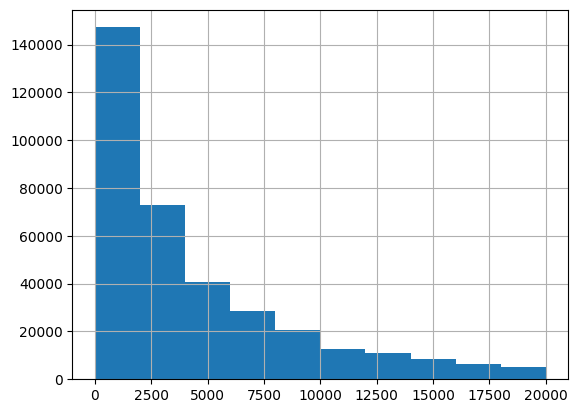

In [1553]:
data['Price'].hist()

Проверим данные столбца Price на слишком низкие значения

In [1554]:
#Проверка столбца "Price" на слишком малые значения
data[data['Price']<10]['Price'].unique()

array([0, 1, 3, 2, 9, 8, 5, 4, 7], dtype=int64)

В столбце "Price" присутствуют слишком низкие значения. Удалим строки с данными значениями.

In [1555]:
#Количество строк для удаления в столбце Price
data[data['Price']<10]['Price'].count()

12028

In [1556]:
#Удаление некорректных значений в столбце Price
data = data.drop(data[data['Price']<10]['Price'].index, axis=0)

Просмотрим статистические характеристики данных в столбцах.

In [1557]:
#Статистические характеристики данных в столбцах
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,342341.000000,342341.000000,342341.000000,342341.000000,342341.000000
mean,4571.829576,2003.203937,116.474492,128387.076044,6.070246
std,4514.884523,7.259167,56.153207,37423.070271,3.337647
min,10.000000,1923.000000,50.000000,5000.000000,1.000000
25%,1200.000000,1999.000000,75.000000,125000.000000,3.000000
50%,2900.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6500.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,2019.000000,1500.000000,150000.000000,12.000000


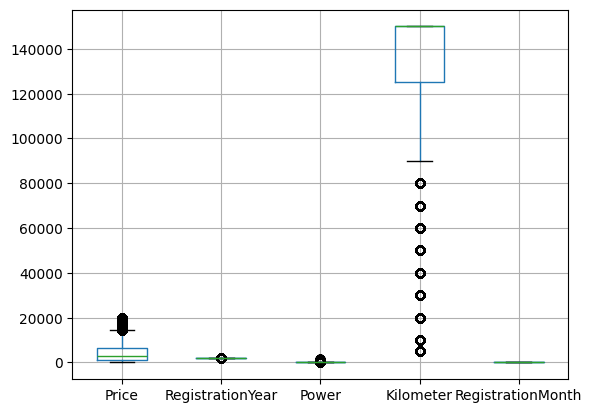

In [1558]:
#Ящик с усами для исследования распределения данных в столбцах
data.boxplot()
plt.show()

Поскольку у ящиков с усами разные диапазоны значений, рассмотрим их в отдельности

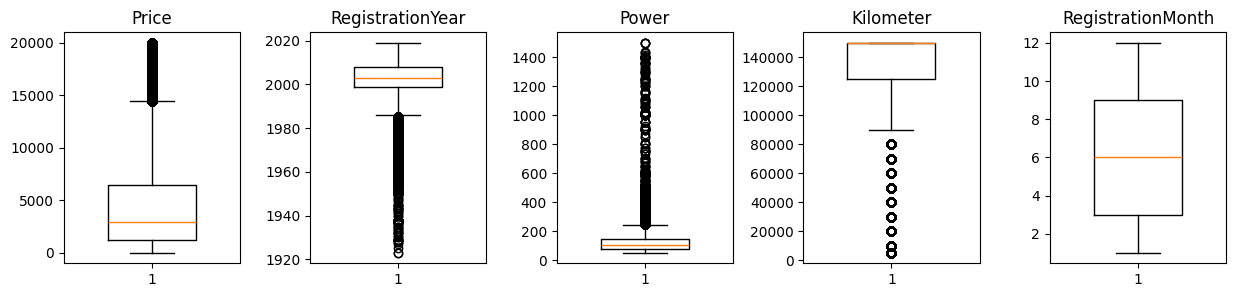

In [1559]:
#Ящик с усами для исследования распределения данных в столбцах
figure, axis = plt.subplots(1, 5, figsize=(15,3), width_ratios=None)
plt.subplots_adjust( wspace= 0.4)
columns = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']
for i,column in enumerate(columns):
    axis[i].boxplot(data[column], widths=0.5)
    axis[i].set_title(column)
plt.show()

Из графика видно, что имеются выбросы в столбцах "Price", "RegistrationYear", "Power" и "Kilometer"

Удалим выбросы в указанных столбцах, удаляя строки. Без удаления выбросов значения RMSE обученных моделей в дальнейшем окажутся хуже.

In [1560]:
columns = ["Price", "RegistrationYear", "Power", "Kilometer"]
total_number_of_lines = 0
for column in columns:
    Q1=np.array(data[column].quantile(0.25))
    Q3=np.array(data[column].quantile(0.75))
    IQR = Q3 - Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR    
    number_of_lines = data[(data[column]>=upper) | (data[column]<=lower)][column].count()
    total_number_of_lines += number_of_lines
    print('Количество строк для удаления ' + column + ":", number_of_lines)
    data = data.drop(data[(data[column]>=upper) | (data[column]<=lower)].index, axis=0)

print("Было удалено:", total_number_of_lines)

Количество строк для удаления Price: 18951
Количество строк для удаления RegistrationYear: 5963
Количество строк для удаления Power: 6164
Количество строк для удаления Kilometer: 39940
Было удалено: 71018


## Обучение моделей

### Кодирование данных и деление на обучающую и тестовую выборки

In [1561]:
#Кодирование данных
data_ohe = data.copy()
data_ohe = pd.get_dummies(data_ohe, drop_first=True)

In [1562]:
#Выделение основных признаков и целевого признака не обработанных кодированием
features = data.drop('Price', axis=1)
target = data['Price']

In [1563]:
# Выделение в таблице основных признаков и целевого обработанных кодированием
features_ohe = data_ohe.drop('Price', axis=1)
target_ohe = data_ohe['Price']

In [1564]:
#Выделение обучающей и тестовой выборок не обработанных кодированием
features_train,features_test,target_train,target_test = train_test_split(features,
                                             target,
                                             test_size = 0.25,
                                             random_state = 12345)

In [1565]:
#Выделение обучающей и тестовой выборок обработанных кодированием
features_ohe_train,features_ohe_test,target_ohe_train,target_ohe_test = train_test_split(features_ohe,
                                             target_ohe,
                                             test_size = 0.25,
                                             random_state = 12345)

Было выполнено кодирование категориальных признаков.

### Создание и обучение модели RandomForestRegressor

In [1566]:
#Создание модели случайного леса для поиска лучших значений ее параметров
model_rfr = RandomForestRegressor()

In [1567]:
#Список параметров и диапазоны значений для определения наилучших для модели
parameters = {'n_estimators': range (5, 15, 5),
              'max_depth': range (5,15, 5)}

In [1568]:
#Для определения наилучших значений параметров модели используем функцию GridSearchCV
grid = GridSearchCV(model_rfr, parameters, cv=5, scoring='neg_mean_squared_error')

In [1569]:
#Поиск лучших значений параметров модели
grid.fit(features_ohe_train, target_ohe_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(5, 15, 5),
                         'n_estimators': range(5, 15, 5)},
             scoring='neg_mean_squared_error')

In [1570]:
#Вывод лучших значений параметров модели
grid.best_params_

{'max_depth': 10, 'n_estimators': 10}

In [1571]:
#Создание модели случайного леса с использованием найденных значений ее параметров
model_rfr = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=10)

In [1572]:
%%time
#Обучение модели случайного леса
model_rfr.fit(features_ohe_train,target_ohe_train)

CPU times: total: 32 s
Wall time: 32 s


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=12345)

### Создание и обучение модели LinearRegression

In [1573]:
#Создание модели LinearRegression
model_lr = LinearRegression()

In [1574]:
%%time
#Обучение модели LinearRegression
model_lr.fit(features_ohe_train, target_ohe_train)

CPU times: total: 27.4 s
Wall time: 5.69 s


LinearRegression()

### Создание и обучение модели CatBoostRegressor

In [1575]:
# Создание модели catboostregressor
model_catboost  = CatBoostRegressor(loss_function='RMSE')

In [1576]:
#Указание для модели категориальных признаков обучающей выборки
cat_features = ['VehicleType', 'Gearbox', 'Model','FuelType', 'Repaired', 'Brand']

In [1577]:
%%time
#Обучение модели CatBoostRegressor
model_catboost.fit(features_train, target_train, cat_features, verbose=False) 

CPU times: total: 18min 26s
Wall time: 3min 3s


### Создание и обучение модели LightGBM

In [1578]:
#Создание модели LightGBM
model_LGBM = LGBMRegressor()

In [1579]:
features_train_LGBM = features_train.copy()
features_test_LGBM = features_test.copy()

features_train_LGBM = features_train_LGBM.astype({"VehicleType":'category',
                                  "Gearbox":'category',
                                  "Model":'category',
                                  "FuelType":'category',
                                  "Brand":'category',
                                  "Repaired":'category'})
features_test_LGBM = features_test_LGBM.astype({"VehicleType":'category',
                                  "Gearbox":'category',
                                  "Model":'category',
                                  "FuelType":'category',
                                  "Brand":'category',
                                  "Repaired":'category'})

In [1580]:
%%time
#Обучение модели LightGBM
model_LGBM.fit(features_train_LGBM, target_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 203492, number of used features: 10
[LightGBM] [Info] Start training from score 3380.193226
CPU times: total: 4.97 s
Wall time: 1.33 s


LGBMRegressor()

## Анализ моделей

### Модель RandomForestRegressor

In [1581]:
%%time
#Предсказания модели случайного леса на тестовой выборке
predictions_rfr = model_rfr.predict(features_ohe_test)

CPU times: total: 297 ms
Wall time: 240 ms


In [1582]:
#RMSE
result = mean_squared_error(target_ohe_test,predictions_rfr,squared=False)

In [1583]:
#Вывод RMSE
print("RMSE модели случайного леса:",result)

RMSE модели случайного леса: 1461.3245253240334


### Модель LinearRegression

In [1584]:
%%time
#Предсказания модели LinearRegression
predictions_lr = model_lr.predict(features_ohe_test)

CPU times: total: 406 ms
Wall time: 289 ms


In [1585]:
#RMSE
result = mean_squared_error(target_ohe_test, predictions_lr) ** 0.5

In [1586]:
#Вывод RMSE
print("RMSE модели линейной регрессии:", result)

RMSE модели линейной регрессии: 1779.5527113019134


### Модель CatboostRegressor

In [1587]:
%%time
#Предсказания модели CatboostRegressor
predictions_catboost = model_catboost.predict(features_test)

CPU times: total: 1.52 s
Wall time: 429 ms


In [1588]:
#RMSE
result = mean_squared_error(target_test, predictions_catboost) ** 0.5

In [1589]:
#Вывод RMSE
print("RMSE модели CatBoostRegressor:", result)

RMSE модели CatBoostRegressor: 1226.839090058853


### Модель LightGBM

In [1590]:
%%time
#Предсказания модели Модель LightGBM
predictions_LGBM = model_LGBM.predict(features_test_LGBM)

CPU times: total: 1.03 s
Wall time: 281 ms


In [1591]:
#RMSE
result = mean_squared_error(target_test, predictions_LGBM) ** 0.5

In [1592]:
#Вывод RMSE
print("RMSE модели LightGBM:", result)

RMSE модели LightGBM: 1238.704679582154


Все показатели(время обучения, время предсказания и качество) для удобства были собраны в одной таблице.

In [1593]:
df_review = pd.DataFrame(np.array([['32 s','240 ms','1461.3'],
                            ['5.69 s','289 ms','1779.55'],
                            ['3min 3s','429 ms','1226.8'],
                            ['1.33 s','281 ms','1238.7']]), 
                  columns=['время обучения', 'время предсказания','качество'], 
                  index=['RandomForestRegressor','LinearRegression','CatBoostRegressor', 'LGBMRegressor'])

In [1594]:
df_review

,время обучения,время предсказания,качество
RandomForestRegressor,32 s,240 ms,1461.3
LinearRegression,5.69 s,289 ms,1779.55
CatBoostRegressor,3min 3s,429 ms,1226.8
LGBMRegressor,1.33 s,281 ms,1238.7


### Вывод

Модель градиентного бустинга LGBMRegressor обладает наименьшим временем обучения и вместе с другой моделью градиентого бустинга, CatBoostRegressor, - наилучшим качеством, значения метрики RMSE у них отличаются незначительно. 
На втором месте по времени обучения стоит модель линейной регрессии, но ее качество оказывается хуже, чем у всех остальных моделей.
Модели линейной регрессии и случайного леса уступают по качеству моделям градиентного бустинга, CatBoostRegressor и LGBMRegressor. Эти модели выигрывают у CatBoostRegressor по времени обучения и времени предсказания и модель случайного леса немного выигрывает у модели LGBMRegressor по времени предсказания. Однако, наблюдаемая разница по времени предсказания и времени обучения некритична, особенно в сравнении с LGBMRegressor, и предпочтение при выборе моделей стоит отдать их качеству. То есть при решении данной задачи остановить свой выбор стоит на моделях CatBoostRegressor и LGBMRegressor, или, учитывая время обучения и время предсказания, на одной модели - LGBMRegressor. Её качество лишь немногим уступает качеству модели CatBoostRegressor, а время обучения и время предсказания существенно меньше.

## Вывод

При решении задачи было обучено несколько разных моделей. Были проанализированы время обучения, время предсказания и качество этих моделей. В результате, стоит остановить свой выбор на моделях CatBoostRegressor и LGBMRegressor, или на одной модели - LGBMRegressor.